In [1]:
%load_ext autoreload
%autoreload 2

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import json
from random import sample

import matplotlib.pyplot as plt
import seaborn as sns


import torch
import torch.nn.functional as F

from transformers import *

import collections
import os

import nltk
%matplotlib inline

from pandas import Series,DataFrame
import pandas as pd

import json
import re

In [24]:
# 处理 bless 数据
# 先处理 DiffVec的数据
filename = 'sim_eval_bless.csv'
file_colname=['word1','word2','relation']
df = pd.read_csv(filename,header=None,names=file_colname,sep=';')

df

,word1,word2,relation
0,alligator,aggressive,attri
1,alligator,aquatic,attri
2,alligator,big,attri
3,alligator,carnivorous,attri
4,alligator,dangerous,attri
...,...,...,...
26548,sword,say,random
26549,sword,set,random
26550,sword,tram,random
26551,sword,win,random


In [25]:
df_clean = df[df['relation'].str.contains('attri')]
df_clean

,word1,word2,relation
0,alligator,aggressive,attri
1,alligator,aquatic,attri
2,alligator,big,attri
3,alligator,carnivorous,attri
4,alligator,dangerous,attri
...,...,...,...
26405,sword,sharp,attri
26406,sword,shiny,attri
26407,sword,short,attri
26408,sword,small,attri


In [26]:
attri_data = df_clean.groupby(['word1'])['word2'].apply(list).to_dict()
print(attri_data)
print(len(attri_data))

{'acacia': ['brown', 'green', 'large', 'odorous', 'old', 'tall', 'thorny', 'yellow', 'young'], 'alligator': ['aggressive', 'aquatic', 'big', 'carnivorous', 'dangerous', 'ferocious', 'frightening', 'green', 'heavy', 'hungry', 'large', 'long', 'old', 'scary', 'wild', 'young'], 'ambulance': ['clean', 'dirty', 'dusty', 'empty', 'fast', 'full', 'loud', 'new', 'noisy', 'old', 'white'], 'ant': ['black', 'hard-working', 'industrious', 'red', 'small', 'social', 'strong', 'tiny'], 'apple': ['crunchy', 'delicious', 'edible', 'fresh', 'green', 'healthy', 'juicy', 'nutritious', 'red', 'ripe', 'rotten', 'round', 'sour', 'sweet', 'tasty', 'unripe', 'yellow'], 'apricot': ['delicious', 'edible', 'fresh', 'juicy', 'orange', 'ripe', 'rotten', 'round', 'small', 'sweet', 'tasty', 'unripe'], 'axe': ['big', 'dangerous', 'good', 'heavy', 'long', 'new', 'noisy', 'old', 'powerful', 'rusty', 'sharp', 'short', 'small', 'strong', 'useful'], 'bag': ['big', 'breakable', 'brown', 'capacious', 'clean', 'colorful', 'co

In [14]:
templates = [
    'As we all know , * is _ .',
    'The attribute of * is _ .'
]

In [6]:
# 模型
models = {}

model_class, tokenizer_class, shortcut, mask_token = RobertaForMaskedLM, RobertaTokenizer, 'roberta-base', '<mask>'
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

model_class, tokenizer_class, shortcut, mask_token = RobertaForMaskedLM, RobertaTokenizer, 'roberta-large', '<mask>'
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

model, tokenizer, mask_token = models['roberta-large']

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at roberta-base and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


loading state_dict took 0.997 sec


Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at roberta-large and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


loading state_dict took 2.8 sec


As we all know , acacia is _ .
['toxic', 'addictive', 'delicious', 'poisonous', 'a', 'expensive', 'beautiful', 'wonderful', 'dangerous', 'nutritious']
tensor([0.0492, 0.0490, 0.0468, 0.0366, 0.0218, 0.0193, 0.0148, 0.0119, 0.0115,
        0.0112])
odorousis not in list
thornyis not in list
{'brown': tensor(0.0011), 'green': tensor(0.0070), 'large': tensor(0.0002), 'old': tensor(0.0006), 'tall': tensor(0.0004), 'yellow': tensor(0.0018), 'young': tensor(0.0002)}
max_probe is: tensor(0.0070)
20
40
the position of max probe is: 21
-----------------------------------------------------
*****************************************************
As we all know , alligator is _ .
['delicious', 'dangerous', 'a', 'evil', 'awesome', 'scary', 'real', 'deadly', 'poisonous', 'dead']
tensor([0.0709, 0.0311, 0.0282, 0.0228, 0.0216, 0.0196, 0.0156, 0.0155, 0.0154,
        0.0147])
carnivorousis not in list
{'aggressive': tensor(0.0011), 'aquatic': tensor(7.7476e-05), 'big': tensor(0.0067), 'dangerous': tenso

['king', 'best', 'important', 'underrated', 'sexy', 'optional', 'hot', 'the', 'breakfast', 'good']
tensor([0.0376, 0.0292, 0.0185, 0.0145, 0.0140, 0.0132, 0.0131, 0.0122, 0.0115,
        0.0108])
cosyis not in list
{'antique': tensor(4.8089e-06), 'comfortable': tensor(0.0012), 'flat': tensor(0.0015), 'hard': tensor(0.0041), 'heavy': tensor(0.0012), 'long': tensor(0.0009), 'new': tensor(0.0007), 'old': tensor(0.0002), 'rectangular': tensor(5.2688e-05), 'round': tensor(0.0003), 'soft': tensor(0.0008), 'uncomfortable': tensor(0.0004), 'warm': tensor(0.0022)}
max_probe is: tensor(0.0041)
20
40
the position of max probe is: 39
-----------------------------------------------------
*****************************************************
As we all know , beet is _ .
['red', 'a', 'beet', 'delicious', 'green', 'not', 'acidic', 'healthy', 'nutritious', 'good']
tensor([0.0469, 0.0464, 0.0394, 0.0279, 0.0215, 0.0165, 0.0153, 0.0145, 0.0123,
        0.0120])
{'edible': tensor(0.0007), 'fresh': tensor(

['bull', 'back', 'shit', 'right', 'ass', 'dumb', 'good', 'cute', 'stupid', 'crap']
tensor([0.2577, 0.0575, 0.0538, 0.0323, 0.0296, 0.0236, 0.0187, 0.0138, 0.0136,
        0.0126])
{'aggressive': tensor(0.0001), 'big': tensor(0.0005), 'black': tensor(0.0032), 'brown': tensor(6.8214e-05), 'dangerous': tensor(0.0007), 'domestic': tensor(2.0042e-06), 'fast': tensor(0.0022), 'gray': tensor(1.1843e-05), 'grey': tensor(4.2652e-05), 'heavy': tensor(0.0001), 'large': tensor(1.8934e-05), 'male': tensor(0.0003), 'old': tensor(4.3974e-05), 'strong': tensor(0.0008), 'young': tensor(0.0002)}
max_probe is: tensor(0.0032)
20
40
80
the position of max probe is: 45
-----------------------------------------------------
*****************************************************
As we all know , bus is _ .
['a', 'the', 'not', 'an', 'bus', 'best', 'like', 'fast', 'awesome', 'good']
tensor([0.2170, 0.0448, 0.0331, 0.0291, 0.0186, 0.0132, 0.0114, 0.0114, 0.0099,
        0.0095])
{'beautiful': tensor(0.0037), 'big'

['delicious', 'amazing', 'awesome', 'expensive', 'healthy', 'good', 'disgusting', 'wonderful', 'evil', 'vegan']
tensor([0.2166, 0.0235, 0.0223, 0.0189, 0.0178, 0.0160, 0.0121, 0.0115, 0.0107,
        0.0098])
{'edible': tensor(0.0037), 'fresh': tensor(0.0006), 'nutritious': tensor(0.0060), 'rotten': tensor(0.0001), 'round': tensor(0.0010), 'white': tensor(0.0038)}
max_probe is: tensor(0.0060)
20
40
the position of max probe is: 21
-----------------------------------------------------
*****************************************************
As we all know , cedar is _ .
['expensive', 'delicious', 'beautiful', 'special', 'tough', 'awesome', 'toxic', 'everywhere', 'green', 'red']
tensor([0.0323, 0.0286, 0.0257, 0.0233, 0.0199, 0.0173, 0.0145, 0.0138, 0.0131,
        0.0131])
odorousis not in list
{'brown': tensor(0.0015), 'green': tensor(0.0131), 'long': tensor(0.0003), 'old': tensor(0.0029), 'tall': tensor(0.0038), 'young': tensor(0.0002)}
max_probe is: tensor(0.0131)
the position of max pr

['a', 'for', 'an', 'just', 'pronounced', 'the', 'not', 'from', 'and', 'in']
tensor([0.1640, 0.0697, 0.0429, 0.0351, 0.0273, 0.0241, 0.0237, 0.0207, 0.0186,
        0.0178])
slimyis not in list
{'big': tensor(0.0004), 'edible': tensor(1.1981e-07), 'fast': tensor(0.0005), 'fresh': tensor(1.8665e-06), 'good': tensor(0.0003), 'large': tensor(0.0002), 'old': tensor(0.0003), 'silent': tensor(0.0007), 'silver': tensor(9.7757e-07), 'young': tensor(4.9321e-05)}
max_probe is: tensor(0.0007)
20
40
80
160
320
the position of max probe is: 162
-----------------------------------------------------
*****************************************************
As we all know , corkscrew is _ .
['a', 'awesome', 'cool', 'fun', 'the', 'expensive', 'amazing', 'addictive', 'huge', 'great']
tensor([0.0661, 0.0471, 0.0241, 0.0183, 0.0151, 0.0136, 0.0126, 0.0117, 0.0105,
        0.0098])
{'big': tensor(0.0051), 'blunt': tensor(0.0004), 'cheap': tensor(0.0042), 'classic': tensor(0.0014), 'expensive': tensor(0.0136), '

['delicious', 'expensive', 'everywhere', 'awesome', 'meat', 'king', 'dead', 'dangerous', 'tasty', 'good']
tensor([0.0662, 0.0582, 0.0327, 0.0306, 0.0186, 0.0145, 0.0142, 0.0142, 0.0132,
        0.0124])
herbivorousis not in list
{'big': tensor(0.0058), 'brown': tensor(0.0003), 'edible': tensor(0.0011), 'fast': tensor(0.0031), 'large': tensor(0.0003), 'old': tensor(0.0002), 'timid': tensor(1.3799e-05), 'wild': tensor(0.0027), 'young': tensor(0.0002)}
max_probe is: tensor(0.0058)
20
40
the position of max probe is: 29
-----------------------------------------------------
*****************************************************
As we all know , desk is _ .
['a', 'king', 'important', 'the', 'hard', 'not', 'subjective', 'key', 'power', 'expensive']
tensor([0.0506, 0.0402, 0.0306, 0.0242, 0.0124, 0.0120, 0.0118, 0.0117, 0.0113,
        0.0102])
{'antique': tensor(2.6989e-05), 'dusty': tensor(5.5145e-05), 'empty': tensor(0.0052), 'flat': tensor(0.0013), 'large': tensor(0.0004), 'new': tensor(0.0

['a', 'the', 'an', 'not', 'like', 'in', 'called', 'and', 'for', 'about']
tensor([0.2478, 0.0507, 0.0388, 0.0349, 0.0175, 0.0122, 0.0120, 0.0108, 0.0099,
        0.0091])
{'big': tensor(0.0022), 'cheap': tensor(0.0006), 'empty': tensor(0.0003), 'expensive': tensor(0.0051), 'fast': tensor(0.0046), 'full': tensor(0.0004), 'gray': tensor(1.2717e-05), 'grey': tensor(3.2390e-05), 'heavy': tensor(0.0006), 'large': tensor(0.0004), 'long': tensor(0.0044), 'new': tensor(0.0008), 'old': tensor(0.0009), 'short': tensor(0.0017), 'slow': tensor(0.0008)}
max_probe is: tensor(0.0051)
20
the position of max probe is: 16
-----------------------------------------------------
*****************************************************
As we all know , fighter is _ .
['best', 'fighter', 'king', 'better', 'champion', 'good', 'stronger', 'winner', 'warrior', 'the']
tensor([0.0976, 0.0852, 0.0675, 0.0303, 0.0241, 0.0135, 0.0123, 0.0121, 0.0108,
        0.0105])
{'big': tensor(0.0002), 'dangerous': tensor(0.0021), '

['key', 'important', 'king', 'ball', 'clutch', 'better', 'glove', 'everything', 'best', 'life']
tensor([0.2086, 0.0819, 0.0419, 0.0302, 0.0299, 0.0234, 0.0207, 0.0207, 0.0206,
        0.0196])
{'black': tensor(0.0001), 'brown': tensor(7.3512e-06), 'clean': tensor(0.0007), 'colorful': tensor(5.1289e-06), 'colourful': tensor(5.8524e-07), 'dirty': tensor(0.0011), 'elegant': tensor(1.8419e-05), 'expensive': tensor(0.0008), 'fancy': tensor(0.0002), 'fashionable': tensor(3.3475e-06), 'formal': tensor(2.8286e-06), 'long': tensor(0.0002), 'loose': tensor(2.3118e-05), 'new': tensor(0.0001), 'nice': tensor(0.0001), 'old': tensor(2.2001e-05), 'pretty': tensor(0.0001), 'short': tensor(0.0001), 'tight': tensor(0.0003), 'warm': tensor(0.0001)}
max_probe is: tensor(0.0011)
20
40
80
160
the position of max probe is: 86
-----------------------------------------------------
*****************************************************
As we all know , goat is _ .
['a', 'delicious', 'meat', 'good', 'the', 'goat'

['important', 'optional', 'a', 'hat', 'king', 'best', 'everything', 'cool', 'power', 'key']
tensor([0.1103, 0.0343, 0.0328, 0.0267, 0.0236, 0.0234, 0.0217, 0.0175, 0.0169,
        0.0165])
{'big': tensor(0.0047), 'black': tensor(0.0020), 'brown': tensor(3.3326e-05), 'clean': tensor(0.0005), 'colorful': tensor(7.7618e-05), 'comfortable': tensor(0.0002), 'dirty': tensor(0.0004), 'elegant': tensor(0.0003), 'expensive': tensor(0.0055), 'fancy': tensor(0.0004), 'fashionable': tensor(0.0007), 'formal': tensor(2.8420e-05), 'funny': tensor(0.0010), 'hard': tensor(0.0038), 'large': tensor(0.0004), 'loose': tensor(6.1190e-05), 'new': tensor(0.0004), 'old': tensor(0.0003), 'pretty': tensor(0.0029), 'small': tensor(0.0010), 'soft': tensor(0.0004), 'tight': tensor(0.0012), 'warm': tensor(0.0007), 'white': tensor(0.0022)}
max_probe is: tensor(0.0055)
20
40
the position of max probe is: 21
-----------------------------------------------------
*****************************************************
As w

['dangerous', 'deadly', 'poison', 'powerful', 'knife', 'key', 'murder', 'sharp', 'life', 'dagger']
tensor([0.0442, 0.0306, 0.0273, 0.0231, 0.0220, 0.0218, 0.0210, 0.0180, 0.0166,
        0.0132])
{'big': tensor(0.0021), 'blunt': tensor(0.0020), 'dangerous': tensor(0.0442), 'good': tensor(0.0129), 'handy': tensor(0.0009), 'heavy': tensor(0.0013), 'long': tensor(0.0009), 'new': tensor(0.0002), 'old': tensor(5.6174e-05), 'pointed': tensor(9.8407e-05), 'rusty': tensor(2.5350e-05), 'sharp': tensor(0.0180), 'shiny': tensor(3.9264e-05), 'short': tensor(0.0021), 'small': tensor(0.0012), 'strong': tensor(0.0035), 'useful': tensor(0.0008)}
max_probe is: tensor(0.0442)
the position of max probe is: 0
-----------------------------------------------------
*****************************************************
As we all know , lemon is _ .
['good', 'sour', 'bitter', 'delicious', 'sweet', 'acidic', 'expensive', 'best', 'healthy', 'orange']
tensor([0.0962, 0.0946, 0.0816, 0.0696, 0.0384, 0.0223, 0.0181

['a', '.', 'deadly', 'the', 'artillery', 'powerful', 'rifle', 'gun', 'useless', 'bullet']
tensor([0.0569, 0.0224, 0.0154, 0.0120, 0.0118, 0.0115, 0.0095, 0.0087, 0.0083,
        0.0078])
{'accurate': tensor(0.0022), 'black': tensor(0.0007), 'clean': tensor(0.0015), 'dangerous': tensor(0.0067), 'deadly': tensor(0.0154), 'dirty': tensor(0.0005), 'heavy': tensor(0.0061), 'lethal': tensor(0.0040), 'long': tensor(0.0032), 'loud': tensor(0.0003), 'new': tensor(0.0006), 'noisy': tensor(0.0002), 'old': tensor(0.0010), 'short': tensor(0.0035), 'wooden': tensor(0.0023)}
max_probe is: tensor(0.0154)
the position of max probe is: 2
-----------------------------------------------------
*****************************************************
As we all know , oak is _ .
['delicious', 'beautiful', 'good', 'healthy', 'boring', 'green', 'expensive', 'awesome', 'underrated', 'versatile']
tensor([0.0455, 0.0360, 0.0210, 0.0205, 0.0183, 0.0154, 0.0148, 0.0147, 0.0147,
        0.0142])
{'brown': tensor(0.0017

['pig', 'a', 'delicious', 'good', 'pork', 'king', 'bacon', 'best', 'dumb', 'awesome']
tensor([0.0515, 0.0506, 0.0316, 0.0260, 0.0206, 0.0189, 0.0187, 0.0173, 0.0156,
        0.0140])
smellyis not in list
stinkyis not in list
{'big': tensor(0.0013), 'dirty': tensor(0.0006), 'domestic': tensor(5.8841e-05), 'edible': tensor(0.0005), 'fat': tensor(0.0066), 'heavy': tensor(0.0006), 'large': tensor(0.0001), 'muddy': tensor(5.9095e-06), 'old': tensor(0.0002), 'pink': tensor(0.0017), 'wild': tensor(0.0004), 'young': tensor(0.0002)}
max_probe is: tensor(0.0066)
20
40
the position of max probe is: 25
-----------------------------------------------------
*****************************************************
As we all know , pigeon is _ .
['a', 'the', 'beautiful', 'delicious', 'cute', 'not', '.', 'an', 'alive', 'human']
tensor([0.0856, 0.0168, 0.0150, 0.0146, 0.0121, 0.0119, 0.0115, 0.0096, 0.0084,
        0.0083])
{'dirty': tensor(0.0002), 'domestic': tensor(2.6904e-05), 'edible': tensor(0.0004),

['a', 'delicious', 'evil', 'good', 'alive', 'not', 'king', 'the', 'dumb', 'dog']
tensor([0.0761, 0.0285, 0.0163, 0.0156, 0.0139, 0.0137, 0.0121, 0.0118, 0.0117,
        0.0112])
{'dirty': tensor(0.0025), 'domestic': tensor(4.1613e-05), 'fast': tensor(0.0071), 'frightening': tensor(3.8168e-05), 'gray': tensor(0.0003), 'grey': tensor(0.0006), 'little': tensor(0.0002), 'old': tensor(0.0005), 'scary': tensor(0.0022), 'small': tensor(0.0005), 'social': tensor(8.0476e-05), 'ugly': tensor(0.0026), 'white': tensor(0.0045), 'wild': tensor(0.0009), 'young': tensor(0.0003)}
max_probe is: tensor(0.0071)
20
the position of max probe is: 15
-----------------------------------------------------
*****************************************************
As we all know , restaurant is _ .
['a', 'the', 'food', 'expensive', 'not', 'an', 'restaurant', 'like', 'huge', 'important']
tensor([0.1406, 0.0359, 0.0250, 0.0211, 0.0196, 0.0192, 0.0153, 0.0125, 0.0123,
        0.0120])
cosyis not in list
roomyis not in l

['a', 'sheep', 'meat', 'an', 'the', 'not', 'delicious', 'and', 'wool', 'white']
tensor([0.1487, 0.0292, 0.0246, 0.0181, 0.0172, 0.0157, 0.0132, 0.0114, 0.0112,
        0.0111])
cuddlyis not in list
herbivorousis not in list
{'black': tensor(0.0047), 'cute': tensor(0.0084), 'domestic': tensor(0.0002), 'edible': tensor(0.0004), 'gentle': tensor(0.0001), 'old': tensor(0.0004), 'peaceful': tensor(0.0002), 'tame': tensor(7.3181e-05), 'white': tensor(0.0111), 'young': tensor(0.0002)}
max_probe is: tensor(0.0111)
the position of max probe is: 9
-----------------------------------------------------
*****************************************************
As we all know , shirt is _ .
['important', 'a', 'optional', 'not', 'underwear', 'key', 'pants', 'short', 'the', 'best']
tensor([0.1757, 0.0501, 0.0379, 0.0319, 0.0268, 0.0214, 0.0185, 0.0162, 0.0159,
        0.0141])
{'big': tensor(0.0052), 'black': tensor(0.0028), 'blue': tensor(0.0012), 'clean': tensor(0.0010), 'colorful': tensor(7.9070e-05), 

['better', 'stereo', 'mono', 'superior', 'best', 'good', 'analog', 'louder', 'dead', 'great']
tensor([0.1262, 0.0971, 0.0756, 0.0382, 0.0243, 0.0224, 0.0168, 0.0159, 0.0133,
        0.0114])
{'big': tensor(0.0006), 'cheap': tensor(0.0010), 'digital': tensor(0.0047), 'electric': tensor(0.0026), 'electrical': tensor(0.0002), 'electronic': tensor(0.0004), 'expensive': tensor(0.0056), 'good': tensor(0.0224), 'heavy': tensor(0.0001), 'large': tensor(0.0002), 'loud': tensor(0.0099), 'new': tensor(0.0003), 'noisy': tensor(0.0046), 'old': tensor(0.0002), 'popular': tensor(7.6148e-05), 'small': tensor(0.0002), 'square': tensor(9.1082e-05)}
max_probe is: tensor(0.0224)
the position of max probe is: 5
-----------------------------------------------------
*****************************************************
As we all know , stove is _ .
['a', 'important', 'key', 'hot', 'fire', 'the', 'heat', 'power', 'cool', 'awesome']
tensor([0.0414, 0.0391, 0.0311, 0.0305, 0.0192, 0.0142, 0.0128, 0.0120, 0.0117

['a', 'the', 'good', 'best', 'not', 'awesome', 'boring', 'coming', 'fast', 'cool']
tensor([0.1003, 0.0239, 0.0213, 0.0164, 0.0158, 0.0155, 0.0142, 0.0124, 0.0122,
        0.0095])
{'beautiful': tensor(0.0032), 'big': tensor(0.0022), 'cheap': tensor(0.0008), 'clean': tensor(0.0003), 'comfortable': tensor(3.4392e-05), 'crowded': tensor(9.8818e-05), 'dirty': tensor(0.0006), 'dusty': tensor(1.1072e-05), 'electric': tensor(0.0010), 'electrical': tensor(4.1897e-05), 'empty': tensor(0.0006), 'expensive': tensor(0.0077), 'fast': tensor(0.0122), 'full': tensor(0.0006), 'heavy': tensor(0.0011), 'large': tensor(0.0002), 'long': tensor(0.0088), 'loud': tensor(0.0002), 'luxurious': tensor(2.6620e-05), 'luxury': tensor(0.0002), 'new': tensor(0.0008), 'noisy': tensor(0.0003), 'old': tensor(0.0003), 'short': tensor(0.0056), 'slow': tensor(0.0042)}
max_probe is: tensor(0.0122)
the position of max probe is: 8
-----------------------------------------------------
*****************************************

['dead', 'back', 'everywhere', 'right', 'coming', 'evil', 'king', 'a', 'here', 'good']
tensor([0.0592, 0.0320, 0.0292, 0.0291, 0.0208, 0.0208, 0.0163, 0.0161, 0.0151,
        0.0116])
{'aggressive': tensor(0.0004), 'bald': tensor(0.0001), 'brown': tensor(2.6440e-05), 'dangerous': tensor(0.0052), 'large': tensor(0.0003), 'old': tensor(0.0005), 'ugly': tensor(0.0015), 'wild': tensor(0.0001), 'young': tensor(0.0003)}
max_probe is: tensor(0.0052)
20
40
the position of max probe is: 20
-----------------------------------------------------
*****************************************************
As we all know , wardrobe is _ .
['everything', 'personal', 'important', 'key', 'subjective', 'power', 'life', 'optional', 'a', 'crucial']
tensor([0.2625, 0.2096, 0.1614, 0.0390, 0.0224, 0.0122, 0.0121, 0.0086, 0.0077,
        0.0069])
roomyis not in list
{'antique': tensor(2.6095e-07), 'big': tensor(0.0017), 'dusty': tensor(6.8479e-07), 'heavy': tensor(9.5936e-05), 'large': tensor(8.0990e-05), 'messy':

['', 'the', ':', 'that', '.', ',', 'called', 'a', 'not', '']
tensor([0.2048, 0.0703, 0.0652, 0.0487, 0.0352, 0.0264, 0.0196, 0.0161, 0.0083,
        0.0079])
{'clean': tensor(0.0002), 'dirty': tensor(6.1150e-06), 'dusty': tensor(3.6913e-07), 'empty': tensor(0.0001), 'fast': tensor(0.0003), 'full': tensor(0.0004), 'loud': tensor(1.1927e-05), 'new': tensor(0.0004), 'noisy': tensor(6.4665e-06), 'old': tensor(5.7777e-05), 'white': tensor(0.0002)}
max_probe is: tensor(0.0004)
20
40
80
160
320
the position of max probe is: 174
-----------------------------------------------------
*****************************************************
The attribute of ant is _ .
[':', 'called', '', 'the', '.', ',', ';', 'that', 'and', 'a']
tensor([0.1039, 0.0677, 0.0638, 0.0578, 0.0514, 0.0460, 0.0208, 0.0200, 0.0189,
        0.0158])
hard-workingis not in list
industriousis not in list
{'black': tensor(0.0003), 'red': tensor(0.0016), 'small': tensor(0.0005), 'social': tensor(1.7550e-05), 'strong': tensor(0.00

40
80
the position of max probe is: 60
-----------------------------------------------------
*****************************************************
The attribute of birch is _ .
['that', '', 'the', ',', ':', '.', 'called', 'not', 'wood', 'a']
tensor([0.1076, 0.1068, 0.0969, 0.0485, 0.0464, 0.0431, 0.0165, 0.0156, 0.0104,
        0.0100])
{'gray': tensor(0.0001), 'grey': tensor(0.0001), 'long': tensor(0.0021), 'old': tensor(0.0002), 'silver': tensor(8.0676e-05), 'tall': tensor(0.0004), 'white': tensor(0.0013), 'young': tensor(5.0837e-05)}
max_probe is: tensor(0.0021)
20
40
the position of max probe is: 35
-----------------------------------------------------
*****************************************************
The attribute of blouse is _ .
['', ':', 'the', 'that', ',', '.', '', 'a', 'not', 'this']
tensor([0.2846, 0.0666, 0.0649, 0.0335, 0.0299, 0.0200, 0.0156, 0.0155, 0.0149,
        0.0080])
{'big': tensor(6.6773e-05), 'black': tensor(0.0029), 'blue': tensor(0.0011), 'clean': tensor(0

['', ':', 'the', 'called', ',', 'that', '.', 'bus', ';', 'a']
tensor([0.1228, 0.0493, 0.0468, 0.0453, 0.0288, 0.0215, 0.0208, 0.0159, 0.0135,
        0.0126])
{'beautiful': tensor(2.0502e-05), 'big': tensor(7.3395e-05), 'cheap': tensor(3.4564e-05), 'clean': tensor(9.2584e-05), 'comfortable': tensor(2.7110e-06), 'crowded': tensor(4.0766e-06), 'dirty': tensor(7.6606e-06), 'dusty': tensor(1.3741e-07), 'empty': tensor(0.0008), 'expensive': tensor(5.6145e-05), 'fast': tensor(4.7816e-05), 'full': tensor(0.0005), 'heavy': tensor(3.6970e-05), 'large': tensor(0.0002), 'long': tensor(0.0015), 'loud': tensor(8.2262e-06), 'luxurious': tensor(4.6782e-07), 'luxury': tensor(9.7584e-06), 'new': tensor(0.0005), 'noisy': tensor(8.7642e-06), 'old': tensor(2.2784e-05), 'short': tensor(0.0001), 'slow': tensor(1.3171e-05), 'spacious': tensor(3.0977e-06)}
max_probe is: tensor(0.0015)
20
40
80
the position of max probe is: 75
-----------------------------------------------------
******************************

['', 'that', 'the', ',', '.', ':', 'not', 'a', 'called', '']
tensor([0.1316, 0.0923, 0.0761, 0.0614, 0.0526, 0.0498, 0.0151, 0.0106, 0.0103,
        0.0094])
odorousis not in list
{'brown': tensor(0.0003), 'green': tensor(0.0023), 'long': tensor(0.0017), 'old': tensor(0.0002), 'tall': tensor(0.0007), 'young': tensor(6.4098e-05)}
max_probe is: tensor(0.0023)
20
40
the position of max probe is: 28
-----------------------------------------------------
*****************************************************
The attribute of celery is _ .
['the', 'that', ':', '', ',', '.', 'not', 'to', 'a', 'called']
tensor([0.1071, 0.0819, 0.0656, 0.0631, 0.0450, 0.0385, 0.0153, 0.0120, 0.0112,
        0.0105])
crunchyis not in list
stringyis not in list
{'crispy': tensor(7.9627e-06), 'edible': tensor(0.0005), 'fresh': tensor(6.9719e-05), 'green': tensor(0.0027), 'long': tensor(0.0026), 'nutritious': tensor(0.0007), 'rotten': tensor(3.5900e-05)}
max_probe is: tensor(0.0027)
20
40
the position of max probe is

['', 'that', '.', ':', 'the', ',', 'a', '', 'called', ';']
tensor([0.2288, 0.0943, 0.0780, 0.0765, 0.0636, 0.0564, 0.0164, 0.0106, 0.0098,
        0.0076])
{'big': tensor(3.0439e-05), 'blunt': tensor(0.0001), 'cheap': tensor(4.7947e-05), 'classic': tensor(5.5045e-05), 'expensive': tensor(3.1626e-05), 'fancy': tensor(5.3657e-06), 'good': tensor(0.0008), 'handy': tensor(6.6343e-05), 'long': tensor(0.0009), 'modern': tensor(8.7269e-05), 'new': tensor(0.0002), 'old': tensor(3.1637e-05), 'pointed': tensor(8.0000e-05), 'rusty': tensor(2.4894e-06), 'shiny': tensor(1.2493e-05), 'short': tensor(0.0001), 'small': tensor(0.0004), 'strong': tensor(0.0009), 'useful': tensor(0.0004)}
max_probe is: tensor(0.0009)
20
40
80
the position of max probe is: 60
-----------------------------------------------------
*****************************************************
The attribute of corn is _ .
['that', '', ',', '.', 'the', ':', 'yield', 'corn', 'starch', 'not']
tensor([0.0752, 0.0601, 0.0585, 0.0538, 0.05

['', 'the', ':', '.', ',', 'that', 'called', 'a', 'not', ';']
tensor([0.2101, 0.0695, 0.0609, 0.0493, 0.0404, 0.0358, 0.0157, 0.0147, 0.0074,
        0.0069])
{'antique': tensor(9.8687e-06), 'dusty': tensor(1.9519e-06), 'empty': tensor(0.0004), 'flat': tensor(0.0007), 'large': tensor(0.0002), 'new': tensor(0.0004), 'old': tensor(3.7563e-05), 'rectangular': tensor(0.0002), 'round': tensor(4.5355e-05), 'small': tensor(0.0003), 'solid': tensor(0.0003), 'square': tensor(0.0008)}
max_probe is: tensor(0.0008)
20
40
80
160
the position of max probe is: 105
-----------------------------------------------------
*****************************************************
The attribute of dishwasher is _ .
['', ':', 'the', '.', 'that', ',', 'a', 'not', '', 'called']
tensor([0.2206, 0.0870, 0.0560, 0.0427, 0.0354, 0.0335, 0.0172, 0.0113, 0.0109,
        0.0097])
{'clean': tensor(0.0027), 'dirty': tensor(8.8437e-05), 'electric': tensor(0.0001), 'electrical': tensor(0.0001), 'empty': tensor(6.9744e-05), '

['', ':', 'the', '.', ',', 'strength', 'that', 'a', 'his', 'Strength']
tensor([0.1738, 0.0835, 0.0719, 0.0694, 0.0308, 0.0221, 0.0177, 0.0153, 0.0096,
        0.0096])
{'big': tensor(7.6457e-05), 'dangerous': tensor(0.0002), 'deadly': tensor(4.4749e-05), 'destructive': tensor(1.9518e-05), 'expensive': tensor(1.9607e-05), 'fast': tensor(0.0007), 'frightening': tensor(4.8384e-06), 'heavy': tensor(8.0553e-05), 'lethal': tensor(2.5456e-05), 'new': tensor(0.0002), 'old': tensor(4.5181e-05), 'powerful': tensor(0.0011), 'scary': tensor(6.7931e-06), 'small': tensor(0.0001)}
max_probe is: tensor(0.0011)
20
40
80
the position of max probe is: 69
-----------------------------------------------------
*****************************************************
The attribute of flute is _ .
['', '.', ':', 'the', ',', 'that', ';', 'a', 'called', 'this']
tensor([0.1102, 0.1071, 0.1043, 0.0930, 0.0579, 0.0570, 0.0177, 0.0166, 0.0150,
        0.0085])
melodiousis not in list
{'big': tensor(1.1754e-05), 'expen

['the', '', '.', ':', 'that', ',', 'a', ';', 'called', 'not']
tensor([0.0969, 0.0773, 0.0617, 0.0382, 0.0303, 0.0276, 0.0194, 0.0092, 0.0091,
        0.0080])
slimyis not in list
{'golden': tensor(0.0003), 'little': tensor(9.0775e-05), 'old': tensor(7.1003e-05), 'orange': tensor(0.0001), 'red': tensor(0.0012), 'silent': tensor(0.0002), 'small': tensor(0.0007), 'young': tensor(0.0002)}
max_probe is: tensor(0.0012)
20
40
80
160
the position of max probe is: 86
-----------------------------------------------------
*****************************************************
The attribute of goose is _ .
[':', '', '.', ',', 'the', ';', 'that', 'flight', 'called', 'a']
tensor([0.1141, 0.1082, 0.0693, 0.0417, 0.0355, 0.0291, 0.0210, 0.0157, 0.0119,
        0.0118])
{'aquatic': tensor(1.3612e-05), 'domestic': tensor(3.5322e-05), 'edible': tensor(0.0002), 'old': tensor(0.0001), 'white': tensor(0.0032), 'young': tensor(0.0004)}
max_probe is: tensor(0.0032)
20
40
the position of max probe is: 21
------

tensor([0.2543, 0.0954, 0.0897, 0.0432, 0.0411, 0.0213, 0.0191, 0.0187, 0.0155,
        0.0109])
{'aggressive': tensor(0.0003), 'big': tensor(0.0001), 'brown': tensor(0.0002), 'gray': tensor(0.0002), 'grey': tensor(0.0003), 'large': tensor(0.0004), 'old': tensor(0.0001), 'strong': tensor(0.0020), 'wild': tensor(6.1943e-05), 'young': tensor(0.0003)}
max_probe is: tensor(0.0020)
20
40
the position of max probe is: 30
-----------------------------------------------------
*****************************************************
The attribute of helicopter is _ .
['', 'the', ':', 'that', '.', ',', 'a', 'called', '', 'at']
tensor([0.1942, 0.0560, 0.0466, 0.0450, 0.0336, 0.0326, 0.0147, 0.0106, 0.0093,
        0.0080])
{'expensive': tensor(0.0002), 'fast': tensor(0.0008), 'heavy': tensor(0.0003), 'loud': tensor(2.8652e-05), 'new': tensor(0.0004), 'noisy': tensor(4.8220e-05), 'old': tensor(4.3539e-05), 'powerful': tensor(0.0005)}
max_probe is: tensor(0.0008)
20
40
80
160
the position of max probe

['', 'that', 'the', ':', ',', '.', 'not', 'a', 'called', 'to']
tensor([0.0875, 0.0785, 0.0701, 0.0645, 0.0474, 0.0461, 0.0140, 0.0134, 0.0078,
        0.0075])
crunchyis not in list
leafyis not in list
{'edible': tensor(0.0008), 'fresh': tensor(9.8277e-05), 'green': tensor(0.0054), 'rotten': tensor(2.7082e-05)}
max_probe is: tensor(0.0054)
20
the position of max probe is: 14
-----------------------------------------------------
*****************************************************
The attribute of library is _ .
['', '.', ':', 'the', 'library', 'called', ',', 'named', 'not', 'variable']
tensor([0.1559, 0.0444, 0.0362, 0.0341, 0.0291, 0.0246, 0.0140, 0.0133, 0.0123,
        0.0115])
{'big': tensor(4.7274e-05), 'dark': tensor(1.6989e-05), 'empty': tensor(0.0033), 'full': tensor(0.0019), 'large': tensor(0.0002), 'national': tensor(2.3905e-05), 'new': tensor(0.0007), 'old': tensor(8.1687e-05), 'private': tensor(0.0010), 'public': tensor(0.0039), 'quiet': tensor(2.0228e-06), 'small': tensor

['', 'that', 'the', '.', ',', ':', 'not', 'its', 'wood', 'strong']
tensor([0.0925, 0.0772, 0.0700, 0.0611, 0.0607, 0.0457, 0.0133, 0.0107, 0.0100,
        0.0090])
{'brown': tensor(0.0003), 'green': tensor(0.0034), 'hard': tensor(0.0011), 'large': tensor(0.0005), 'mighty': tensor(3.0748e-05), 'old': tensor(0.0002), 'strong': tensor(0.0090), 'tall': tensor(0.0009), 'young': tensor(7.0468e-05)}
max_probe is: tensor(0.0090)
the position of max probe is: 9
-----------------------------------------------------
*****************************************************
The attribute of onion is _ .
[':', '', ',', 'the', '.', 'that', ';', 'called', 'a', 'not']
tensor([0.1379, 0.1001, 0.0698, 0.0502, 0.0475, 0.0338, 0.0164, 0.0119, 0.0091,
        0.0090])
smellyis not in list
stinkyis not in list
{'edible': tensor(0.0006), 'fresh': tensor(4.4523e-05), 'green': tensor(0.0025), 'purple': tensor(0.0002), 'red': tensor(0.0026), 'rotten': tensor(2.3005e-05), 'tasty': tensor(8.6807e-05), 'white': tensor

[':', '', '.', ',', 'the', ';', 'that', 'flight', 'called', 'a']
tensor([0.1431, 0.1281, 0.1025, 0.0466, 0.0373, 0.0313, 0.0185, 0.0153, 0.0128,
        0.0104])
{'dirty': tensor(1.0879e-05), 'domestic': tensor(1.0544e-05), 'edible': tensor(6.7969e-05), 'gray': tensor(0.0002), 'grey': tensor(0.0002), 'old': tensor(7.2243e-05), 'young': tensor(0.0002)}
max_probe is: tensor(0.0002)
20
40
80
160
320
640
the position of max probe is: 340
-----------------------------------------------------
*****************************************************
The attribute of pine is _ .
['the', '', 'that', ',', '.', ':', 'called', 'not', ';', 'a']
tensor([0.0917, 0.0700, 0.0567, 0.0547, 0.0502, 0.0461, 0.0157, 0.0154, 0.0110,
        0.0107])
odorousis not in list
pricklyis not in list
{'brown': tensor(0.0004), 'green': tensor(0.0036), 'hard': tensor(0.0006), 'long': tensor(0.0024), 'old': tensor(0.0002), 'tall': tensor(0.0004), 'young': tensor(8.8341e-05)}
max_probe is: tensor(0.0036)
20
40
the position

['', ':', '.', 'the', ',', 'that', 'called', 'a', ';', 'not']
tensor([0.0878, 0.0861, 0.0681, 0.0407, 0.0375, 0.0143, 0.0124, 0.0120, 0.0110,
        0.0106])
{'dirty': tensor(4.7332e-05), 'domestic': tensor(1.3489e-05), 'fast': tensor(0.0006), 'frightening': tensor(2.6357e-06), 'gray': tensor(0.0004), 'grey': tensor(0.0003), 'little': tensor(8.8950e-05), 'old': tensor(0.0001), 'scary': tensor(4.7271e-06), 'small': tensor(0.0006), 'social': tensor(0.0003), 'ugly': tensor(7.2073e-05), 'white': tensor(0.0016), 'wild': tensor(0.0002), 'young': tensor(0.0002)}
max_probe is: tensor(0.0016)
20
40
80
the position of max probe is: 46
-----------------------------------------------------
*****************************************************
The attribute of restaurant is _ .
['', 'the', ':', '.', 'that', 'not', ',', 'a', 'food', '']
tensor([0.1723, 0.0753, 0.0717, 0.0477, 0.0394, 0.0223, 0.0208, 0.0165, 0.0116,
        0.0103])
cosyis not in list
roomyis not in list
smokyis not in list
{'bad': 

['', 'the', '.', ',', ':', 'that', 'called', 'a', 'not', 'and']
tensor([0.2048, 0.0823, 0.0544, 0.0489, 0.0462, 0.0324, 0.0313, 0.0183, 0.0148,
        0.0121])
{'big': tensor(4.1001e-05), 'dangerous': tensor(3.8785e-05), 'electric': tensor(0.0001), 'electrical': tensor(0.0001), 'flat': tensor(0.0001), 'good': tensor(0.0003), 'handy': tensor(2.6944e-05), 'heavy': tensor(5.2094e-05), 'long': tensor(0.0014), 'new': tensor(0.0003), 'old': tensor(1.6277e-05), 'rusty': tensor(8.9151e-07), 'sharp': tensor(0.0005), 'short': tensor(0.0002), 'small': tensor(0.0007), 'useful': tensor(0.0003)}
max_probe is: tensor(0.0014)
20
40
80
the position of max probe is: 61
-----------------------------------------------------
*****************************************************
The attribute of sheep is _ .
['', 'the', ':', '.', 'that', ',', 'wool', ';', 'strength', 'a']
tensor([0.0731, 0.0554, 0.0468, 0.0452, 0.0435, 0.0345, 0.0271, 0.0139, 0.0131,
        0.0110])
cuddlyis not in list
herbivorousis not 

['', ':', '.', 'the', ',', 'that', ';', 'a', '', 'this']
tensor([0.1987, 0.0904, 0.0672, 0.0501, 0.0492, 0.0490, 0.0118, 0.0117, 0.0079,
        0.0074])
{'big': tensor(6.1878e-05), 'clean': tensor(0.0004), 'dirty': tensor(2.4748e-05), 'good': tensor(0.0010), 'long': tensor(0.0007), 'new': tensor(0.0002), 'old': tensor(5.0821e-05), 'round': tensor(0.0002), 'shiny': tensor(3.0552e-05), 'short': tensor(0.0002), 'small': tensor(0.0006), 'useful': tensor(0.0006)}
max_probe is: tensor(0.0010)
20
40
80
the position of max probe is: 64
-----------------------------------------------------
*****************************************************
The attribute of squirrel is _ .
['', '.', ':', ',', 'the', 'that', ';', 'a', '', 'called']
tensor([0.1666, 0.1261, 0.0960, 0.0499, 0.0380, 0.0178, 0.0151, 0.0105, 0.0071,
        0.0065])
arborealis not in list
{'brown': tensor(0.0008), 'cute': tensor(5.2140e-05), 'fast': tensor(0.0006), 'fluffy': tensor(3.4658e-05), 'friendly': tensor(4.4427e-05), 'gray

max_probe is: tensor(0.0119)
the position of max probe is: 7
-----------------------------------------------------
*****************************************************
The attribute of toaster is _ .
['', ':', 'the', ',', 'that', '.', 'called', 'a', 'not', '1']
tensor([0.2309, 0.0670, 0.0653, 0.0313, 0.0302, 0.0228, 0.0175, 0.0148, 0.0122,
        0.0087])
{'clean': tensor(0.0003), 'dangerous': tensor(3.0850e-05), 'dirty': tensor(6.0869e-06), 'electric': tensor(0.0005), 'electrical': tensor(0.0005), 'good': tensor(0.0011), 'hot': tensor(0.0007), 'new': tensor(0.0007), 'old': tensor(3.3674e-05), 'rectangular': tensor(0.0001)}
max_probe is: tensor(0.0011)
20
40
80
160
the position of max probe is: 80
-----------------------------------------------------
*****************************************************
The attribute of train is _ .
['', ':', 'the', ',', 'that', 'called', '.', 'a', ';', 'and']
tensor([0.1157, 0.0797, 0.0716, 0.0335, 0.0329, 0.0312, 0.0303, 0.0191, 0.0088,
        0.0

['.', ':', '', 'the', ',', 'flight', ';', 'a', 'called', 'that']
tensor([0.1288, 0.0876, 0.0565, 0.0551, 0.0458, 0.0366, 0.0212, 0.0178, 0.0161,
        0.0116])
{'aggressive': tensor(0.0006), 'bald': tensor(0.0001), 'brown': tensor(0.0001), 'dangerous': tensor(0.0002), 'large': tensor(0.0002), 'old': tensor(0.0002), 'ugly': tensor(0.0001), 'wild': tensor(0.0001), 'young': tensor(0.0005)}
max_probe is: tensor(0.0006)
20
40
80
160
the position of max probe is: 132
-----------------------------------------------------
*****************************************************
The attribute of wardrobe is _ .
['', 'the', ':', 'that', '.', ',', 'a', 'called', '', 'not']
tensor([0.1894, 0.0639, 0.0554, 0.0389, 0.0304, 0.0227, 0.0158, 0.0129, 0.0119,
        0.0112])
roomyis not in list
{'antique': tensor(3.6580e-06), 'big': tensor(4.5873e-05), 'dusty': tensor(8.2666e-07), 'heavy': tensor(6.5831e-05), 'large': tensor(0.0001), 'messy': tensor(1.8748e-05), 'new': tensor(0.0003), 'old': tensor(4.940

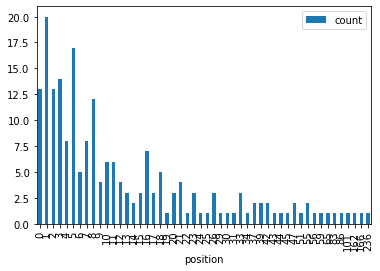

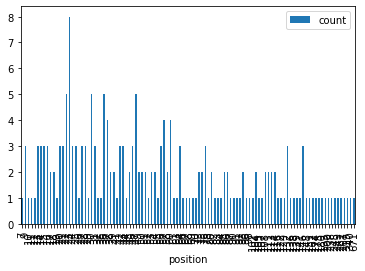

In [28]:
import copy
result_dict = {}
result_dict = copy.deepcopy(attri_data)

#result_dict

for temp_num in range(2):
    count_dict = {}
  
        
    for (key,value) in attri_data.items():
    
        # 没有预测结果的标记
        no_predict = 0

          # 处理模板
        print("==========================================================")
        text = templates[temp_num].replace('*',key)
        print(text)
    
    
        # module
        if mask_token is not None:
            text = text.replace(' _ ', ' %s ' % mask_token)
        tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(text, add_special_tokens=True))
        tokens = ['*' if token in ['*', 'Ġ*'] else token for token in tokens]
        marker = '*'
        if marker in tokens:
            assert tokens.count(marker) == 2, str(tokens)
            p, h = [i for i, token in enumerate(tokens) if token == marker]
            tokens = [token for token in tokens if token != marker]
            h -= 1
            print(tokens[p], tokens[h])
        token_ids = tokenizer.convert_tokens_to_ids(tokens)
        pred_idx = [i for i, token in enumerate(tokens) if token == mask_token] if mask_token is not None else [-1]
        tokens = ['@' + token if not token.startswith('Ġ') and token not in ['<s>', '</s>', '<mask>'] else token.replace('Ġ', '') 
                  for token in tokens] 
        #print(tokens)

        input_ids = torch.tensor([token_ids])
        with torch.no_grad():
            logits, attns = model(input_ids, output_attentions=True)
            probs = F.softmax(logits, dim=-1)

        for i in pred_idx:
            top_probs, top_indexes = probs[0][i].topk(10)
            top_tokens = tokenizer.convert_ids_to_tokens(top_indexes) 


            # remove G
            ans = []
            for word in top_tokens:
                ans.append(word[1:])
            print(ans)
            print(top_probs)


            # 找到每个同义词位于预测的第几个位置，先找到概率最大的，再去找最大的是预测的第几个
            # 找到每个同义词对应的概率
            word_probe = {}
            for word in value:
                word_id = tokenizer._convert_token_to_id('Ġ'+ str(word))
                if (word_id != 3):
                    word_probe[word] = probs[0][i][word_id]
                else:
                    print(word + 'is not in list')

            print(word_probe)

            # 找到同义词中概率最大的词和值

            # 没有反义词在预测的结果里
            # 保存计算结果的json文件中写为 -1
            if (len(word_probe)==0):
                no_predict = 1
                break


            max_word = max(word_probe, key=word_probe.get)
            max_probe = word_probe[max_word]

            print('max_probe is: ',end='')
            print(max_probe)

            # 判断概率最大的同义词是预测的第几个
            # 不要陷入死循环
            # k的值不要超过 tensor 的长度
            k = 10
            probe_get = 0
            while(probe_get == 0):
                top_probs, top_indexes = probs[0][i].topk(k)
                #print(top_probs)
                if max_probe in top_probs:
                    print('the position of max probe is: ',end='')
                    print((top_probs == max_probe).nonzero()[0].item())
                    print('-----------------------------------------------------')

                    probe_get = 1
                else:
                    k=k*2
                    print(k)
                    if (k >= list(probs[0][i].size())[0]):
                        top_probs, top_indexes = probs[0][i].topk(probs[0][i].size())
                        print(top_probs)
                        print('the position of max probe is: ',end='')
                        print((top_probs == max_probe).nonzero()[0].item())
                        print('-----------------------------------------------------')
                        probe_get = 1


            print('*****************************************************')

            
        # 没有预测结果
        if(no_predict == 1):
            # 写入结果文件
            if (temp_num == 0):
                result_dict[key] = [result_dict[key],-1]
            else:
                result_dict[key].append(-1)
            continue

            
        # 有预测结果
        position = (top_probs == max_probe).nonzero()[0].item()
        # 写入结果文件
        if (temp_num == 0):
            result_dict[key] = [result_dict[key],position]
        else:
            result_dict[key].append(position)


        if position not in count_dict:
            count_dict[position] = 1
        else:
            count_dict[position]+=1

       
    
    
    # 画图
    count_dict_keys = count_dict.keys()
    count_dict_values = count_dict.values()

    data = {
        'count':Series(count_dict_values),
        'position':Series(count_dict_keys)
    }

    df = DataFrame(data)
    df.sort_values("position",inplace=True)
    print(df)
    # plt.bar(count_dict_keys,count_dict_values)
    df.plot(x='position',y='count',kind='bar')
    
    
    
# 保存到json文件
with open("result_attri.json", "w") as outfile:  
    json.dump(result_dict, outfile)